In [1]:
# Import Libraries #
import pandas as pd
import numpy as np
import os

In [2]:
###Python shortcut to folder path###
path = r'C:\Users\hazem\01-2023 Instacart Basket Analysis - Master Folder'

In [3]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

# If-Statements with User-Defined Functions

In [4]:
df = ords_prods_merged[:1000000]

In [5]:
## Define a function ##
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [6]:
# Apply the function #
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\hazem\AppData\Local\Temp\ipykernel_4884\1922464390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [7]:
df['price_range'].value_counts(dropna = False)

Mid-range product    652638
Low-range product    338018
High range             9344
Name: price_range, dtype: int64

In [8]:
df['prices'].max()

24.5

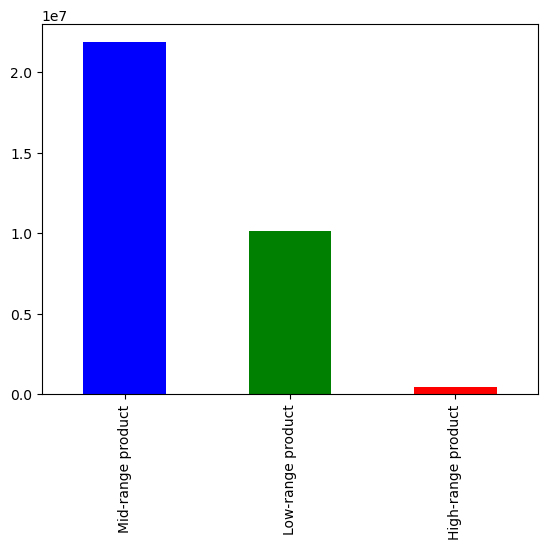

In [9]:
price_bar = ords_prods_merged['price_range_loc'].value_counts().plot.bar(color=['blue','green','red'])

# If-Statements with For-Loops

In [10]:
ords_prods_merged['orders_day_of_week'].value_counts(dropna =False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [11]:
result = []

for value in ords_prods_merged["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [12]:
result

['Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Least busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Bus

In [13]:
ords_prods_merged['busiest_day'] = result

In [14]:
ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Task 4.7 Deriving New Variables

## Define new column 'Busiest_days' to determine the most 2 busiest & solwest days ##

In [15]:
ords_prods_merged['orders_day_of_week'].value_counts(dropna =False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [16]:
result2 = []

for value in ords_prods_merged["orders_day_of_week"]:
  if value == 0 or value == 1:
    result2.append("Busiest days")
  elif value == 3 or value == 4:
    result2.append("Slowest days")
  else:
    result2.append("Neutral days")

In [17]:
result2

['Neutral days',
 'Neutral days',
 'Busiest days',
 'Slowest days',
 'Slowest days',
 'Busiest days',
 'Neutral days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Neutral days',
 'Slowest days',
 'Slowest days',
 'Neutral days',
 'Slowest days',
 'Neutral days',
 'Neutral days',
 'Neutral days',
 'Busiest days',
 'Busiest days',
 'Neutral days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Neutral days',
 'Busiest days',
 'Busiest days',
 'Neutral days',
 'Neutral days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Neutral days',
 'Neutral days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Neutral days',
 'Busiest days',
 'Neutral days',
 'Busiest days',
 'Busiest days',
 'Neutral days',
 'Busiest days

In [18]:
ords_prods_merged['busy_days'] = result2

In [19]:
ords_prods_merged['busy_days'].value_counts(dropna = False)

Neutral days    12916111
Busiest days    11864412
Slowest days     7624336
Name: busy_days, dtype: int64

#when we compare the 2 busiest days to the single ones , the gab between normal days and busiest days is less in 'busy_days'#

# Create a column to identify the busiest hours of the day #

In [20]:
ords_prods_merged.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_of_prior_orders', 'order_frequency_flag'],
      dtype='object')

In [21]:
ords_prods_merged['order_hour_of_day'].value_counts(dropna =False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [22]:
## Define a function ##
def time_label(row):

  if (row['order_hour_of_day'] > 6) and (row['order_hour_of_day'] <= 19):
    return 'Most orders'
  elif row['order_hour_of_day'] > 19:
    return 'Average orders'
  elif row['order_hour_of_day'] <= 6:
    return 'Fewest orders'
  else: return 'Not enough data'

In [ ]:
# Apply the function #
ords_prods_merged['busiest_period_of_day'] = ords_prods_merged.apply(time_label, axis=1)

In [ ]:
ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

In [ ]:
bar_hours = ords_prods_merged['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [ ]:
bar_hours.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_order_hour.png'))

In [ ]:
ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))